## Problem Statement
A US bike-sharing provider BoomBikes a Mobility Services firm has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Essentially the company wants :

* To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.<br />

* To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.<br />

* To know the accuracy of the model, i.e. How well those variables describe the bike demands
They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.<br />

## Business Goal
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## The company wants to know:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

## Approach:
- Reading and Understanding the Data
- Visualising the Data
- Data Preparation and EDA
- Splitting the Data into Training and Testing Sets
- Rescaling the Features
- Building a linear model
- Residual Analysis of the train data
- Making Predictions Using the Final Model
- Model Evaluation

### Step 1: Reading and Understanding the Data
Reading the Bike sharing dataset

In [192]:
# Importing Required Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

#Importing Warning Library to ignore warnings from displaying on UI
import warnings
warnings.filterwarnings('ignore')


In [193]:
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspecting the Dataset

In [194]:
bike_df.shape

(730, 16)

In [195]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [196]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


***Inferences:***<br/>
- In the Bike Prediction dataset there are a total of 730 rows and 16 columns in which we need to use the 'CNT' column for the prediction purposes.
- Except one column, all other are either float or integer type.
- One column is object date type.
- Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.
- We will analyse and finalize whether to convert them to categorical or treat as integer.

#### Data Quality Check

In [197]:
# percentage of missing values in each column
round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [198]:
# percentage of missing values in each row
round(100*(bike_df.isnull().sum(axis=1)/len(bike_df)), 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

***Inferences:***<br/>
There are no missing / Null values either in columns or rows

In [199]:
# Checking for duplicate values

bike_dup = bike_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [200]:
bike_df.shape

(730, 16)

***Inferences:***<br/>
The shape after running the drop duplicate command is same as the original dataframe.
Hence we can conclude that there were zero duplicate values in the dataset.

#### Data Cleaning
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

- instant : This is a index column, we have a default index for the same purpose

- dteday : This column has date. Since, we already have separate year and month column, we can carry out our analysis without this column.

- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two column.

In [201]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [202]:
bike_df1 = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

bike_df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Inspecting data after dropping

In [203]:
bike_df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [204]:
bike_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [205]:
#identifying all the column head
bike_df1.columns 

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [206]:
bike_df1.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


So from the above correlation formed we can clearly see that season,month and weekday which are supposed to be non-numerical are numerical which should be changed

#### Handling outliers

In [207]:
bike_df1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [208]:
#gives info about unique values present in data
bike_df1.nunique() 

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

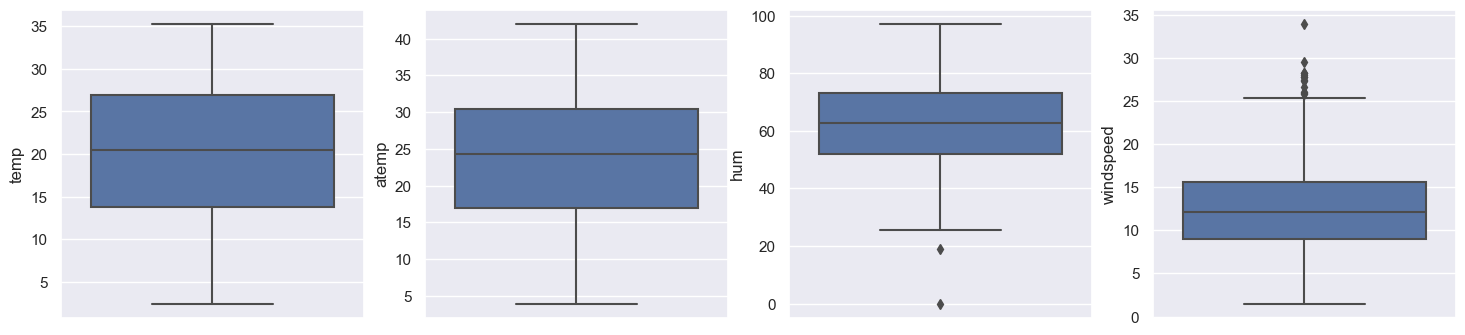

In [209]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df1)
    i+=1

So from the above plots it is clear that we don't have any outliers

### Step 2: Visualising the Data

- We would be able to check if all the variables are linearly related or not (important if we want to proceed with a linear model).
- Checking if there are any multicollinearity that exist.
- Here's where we can also identify if some predictors directly have a strong association(correlation) with the outcome variable.

Visualising Numeric Variables : Using a pairplot

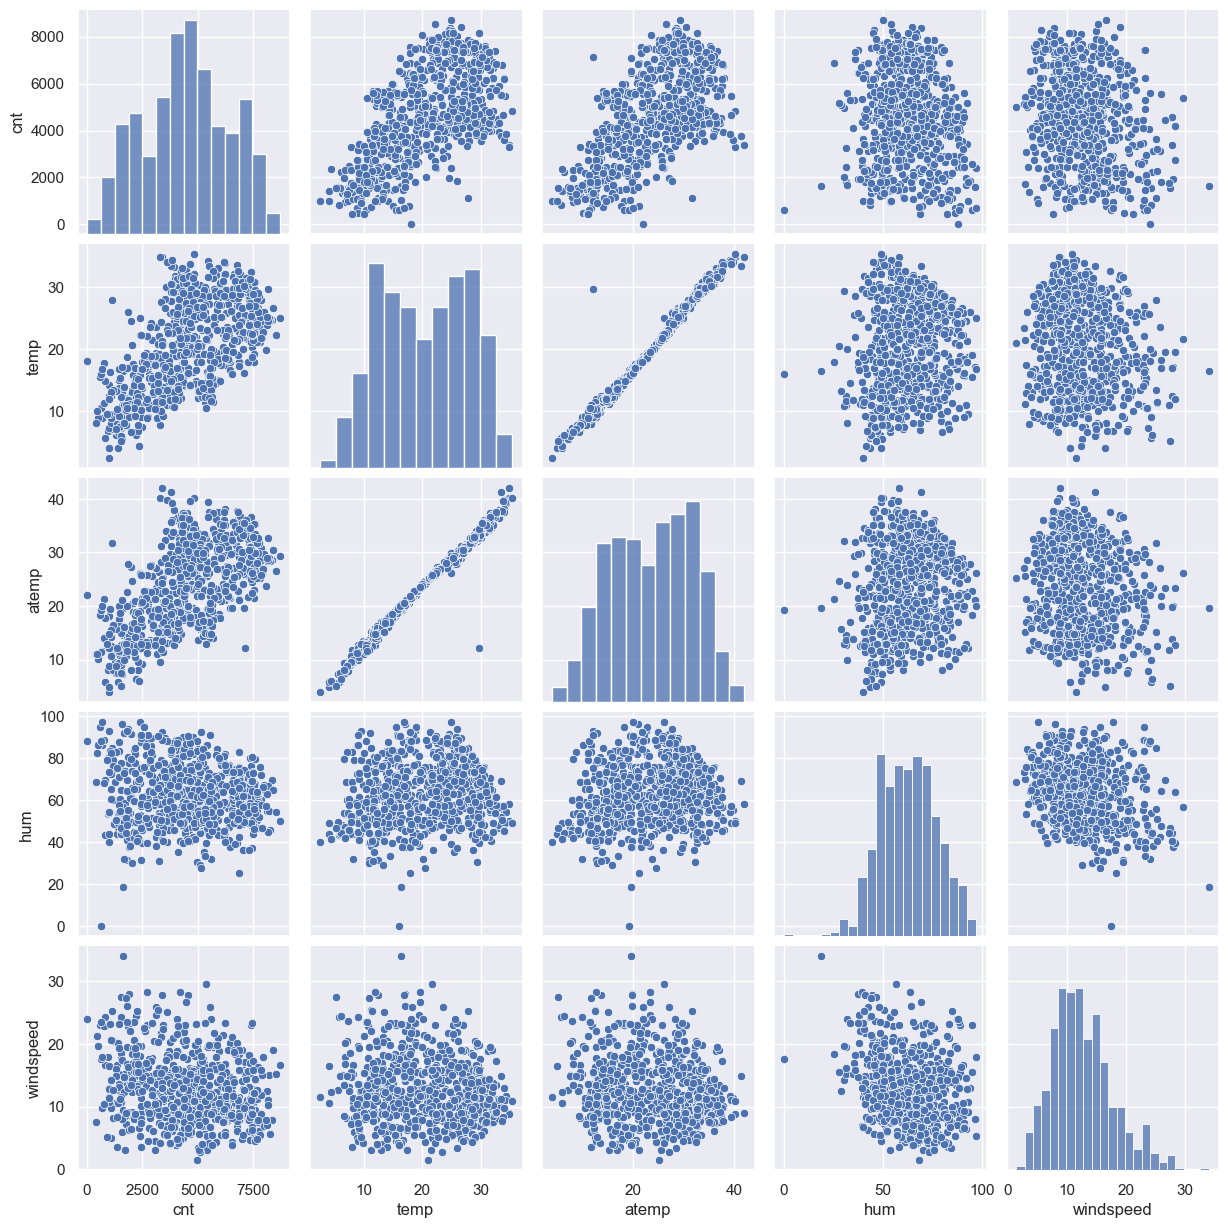

In [210]:
sns.pairplot(data=bike_df1, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

***Inferences:***<br/>
By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .

Visualising Categorical Variables : Using a boxplot

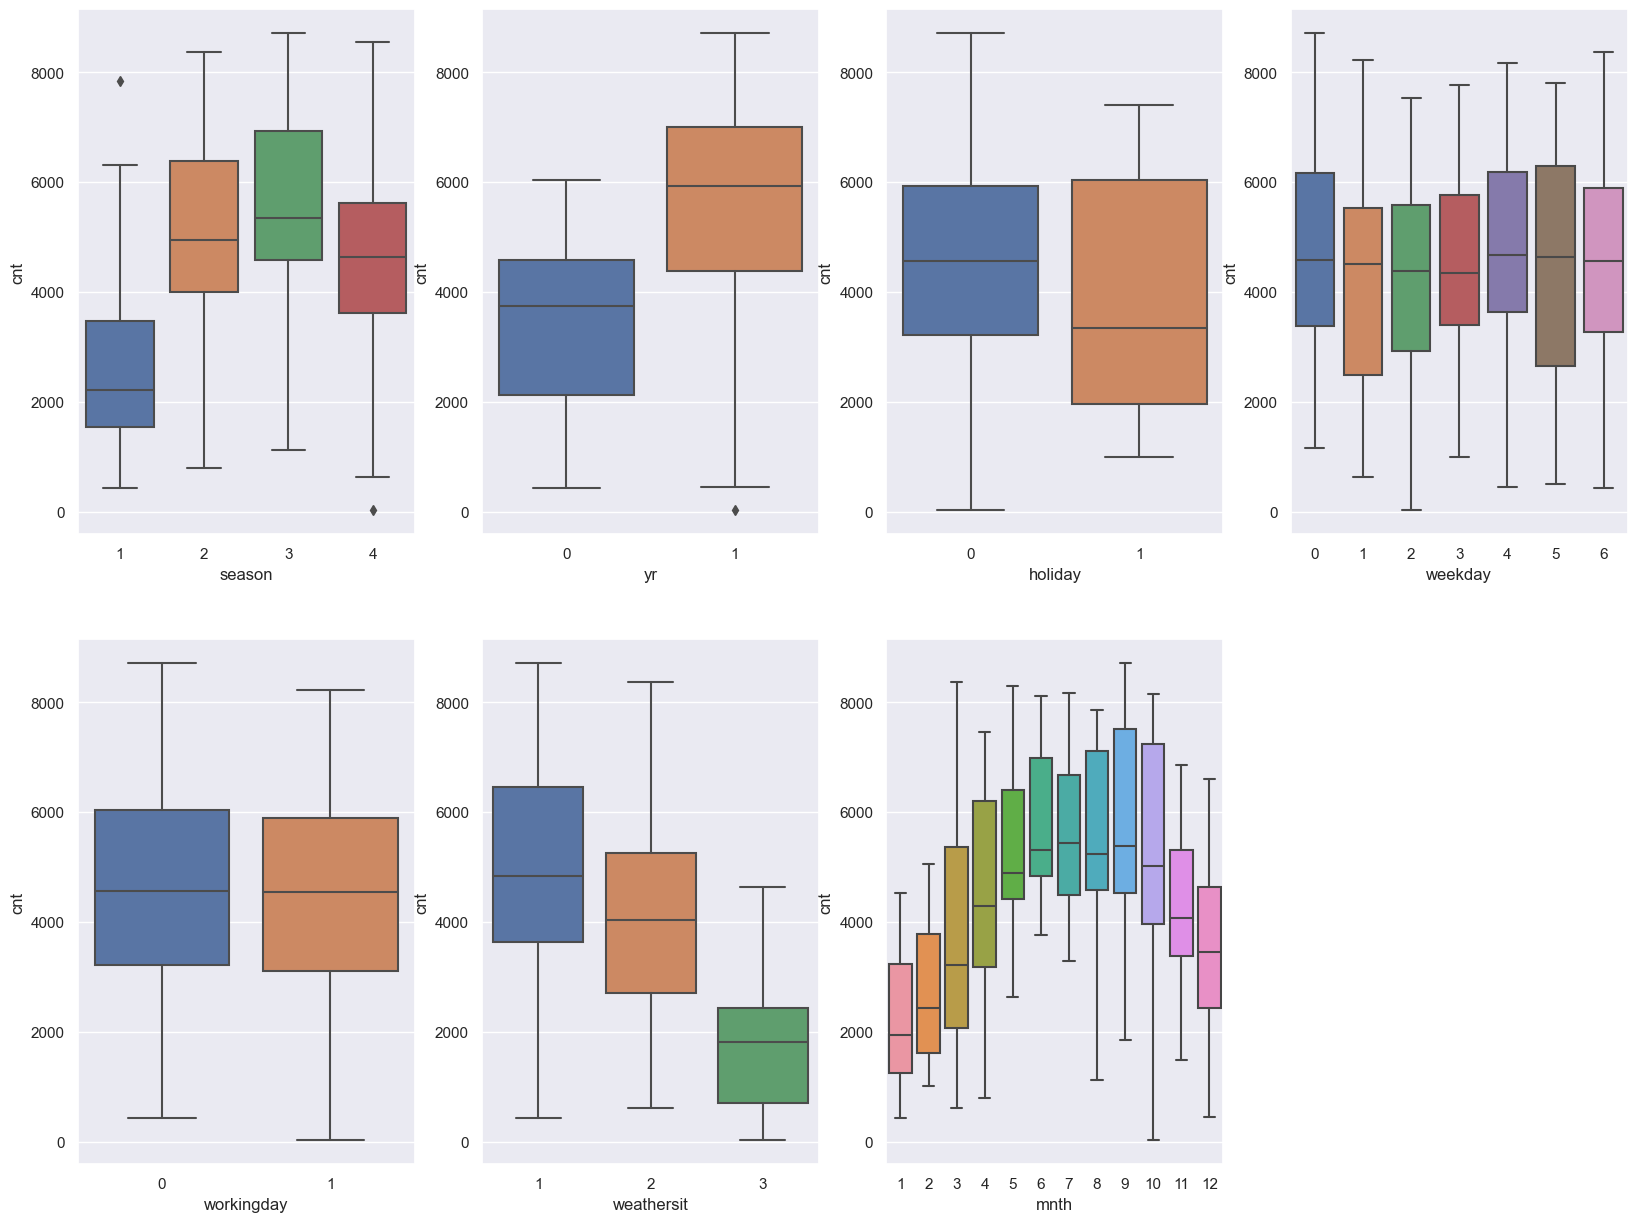

In [211]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df1)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df1)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df1)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df1)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df1)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df1)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df1)
plt.show()

***Inferences:***<br/>
- The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.
- For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring.
- The year 2019 had a higher count of users as compared to the year 2018.
- The count of rentals is almost even throughout the week.
- There are no users when there is heavy rain/ snow indicating that this weather is quite adverse. 
- Highest count was seen when the weather situation was Clear, Partly Cloudy.
- The number of rentals peaked in September, whereas they peaked in December. This observation is consistent with the observations made regarding the weather. As a result of the typical substantial snowfall in December, rentals may have declined.
- The count of users is less during the holidays.
- From the "Workingday" boxplot we can see those maximum bookings happening between 4000 and 6000, that is the median count of users is constant almost throughout the week. There is not much of difference in booking whether its working day or not.

### Step 3: Data Preparation and EDA

Defining set of fucntions which can be useful to plot graph / charts

In [212]:
def bar_graph_plot_function(data, graph_title, x_axis_label, y_axis_label, data_label='horizontal', x_label_rotation=0, x_text=None):
    population_graph = sns.barplot(x=data.index, y=data.values)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)       
    if x_text is None:
        population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    else:
        population_graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

- Conduct univariate analysis to understand the distribution of individual variables
- Perform bivariate analysis to explore the relationship between variables

In [213]:
bike_df1.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

Season column is varied between 1 to 4 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records. <br/>

Season column is categorical column with each value corresponding to specific season.<br/>

We need to map these numbers to respectie seasons, so that these column values will be further used to generate dummy variable as it is a Categorical Nominal Type Data.<br/>

We should map this column as follows:
* 1: spring
* 2: summer
* 3: fall
* 4: winter

In [214]:

bike_df1['season'] = bike_df1['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

##### Let's plot distrubution of Ride Count Mean Across all the Seasons

In [215]:
season_dist = bike_df1.groupby(by='season').cnt.mean().sort_values()

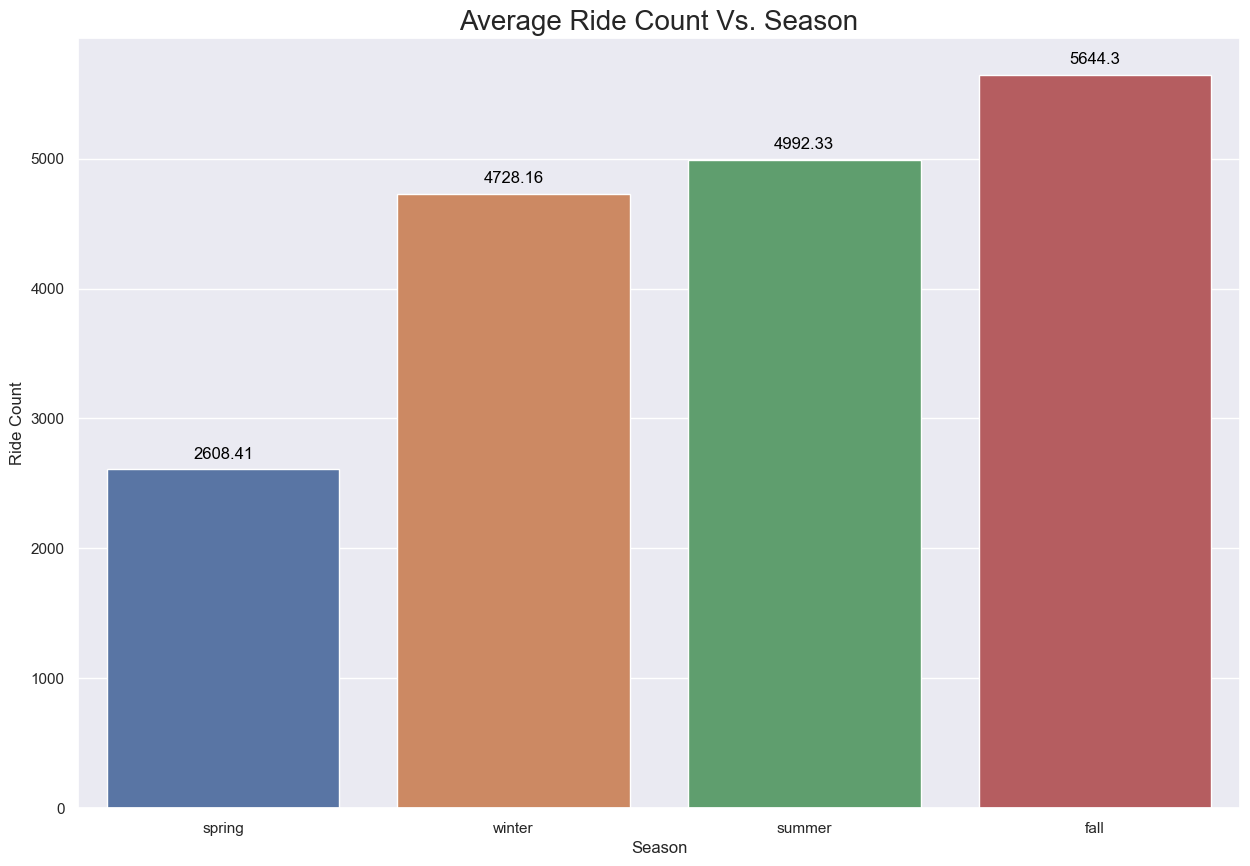

In [216]:
bar_graph_plot_function(data=season_dist, graph_title='Average Ride Count Vs. Season', x_axis_label='Season',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

We see that, distribution is quite different for respective seasons. This might act as a decisive factor.

In [217]:
bike_df1.yr.describe()

count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yr, dtype: float64

Year column is varied between 0 and 1 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records.<br/>

Year column consist of 2 values with 0 corresponding to 2018 & 1 corresponding to 2019.<br/>

We will keep this values as it is, because normalising column consisting of only 0 & 1 will have no effect.<br/>


##### Let's plot distrubution of Ride Count Mean Year-Wise

In [218]:
year_dist = bike_df1.groupby(by='yr').cnt.mean()

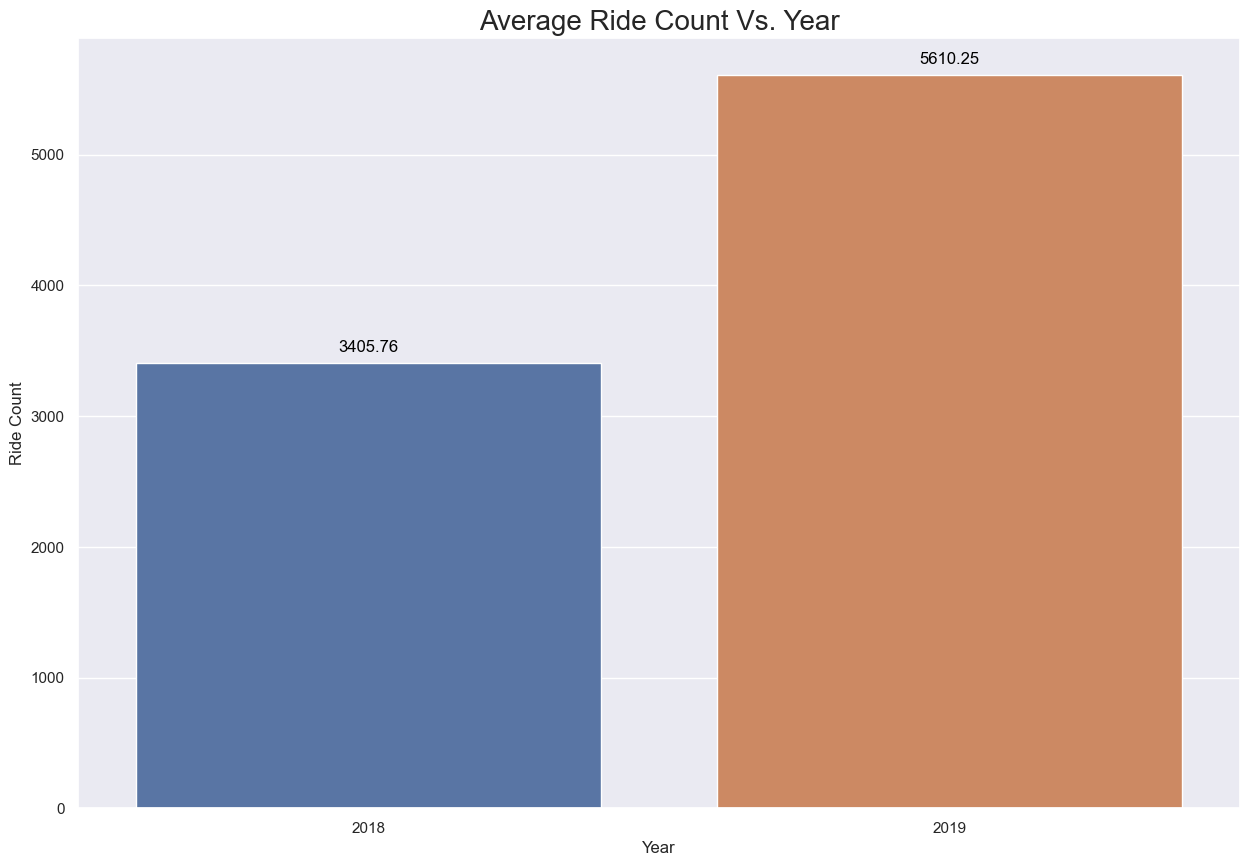

In [219]:
bar_graph_plot_function(data=year_dist, graph_title='Average Ride Count Vs. Year', x_axis_label='Year',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0,
                        x_text=['2018', '2019'])

We see that, Ride Count has increases comparatively in 2019 as compared to 2018. This can also be decisive factor for predicting target (output)

##### Let's plot distrubution of Ride Count Mean Across all the months

In [220]:
bike_df1.mnth.describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

Month column is varied between 1 and 12 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

In [221]:
month_dist = bike_df1.groupby(by='mnth').cnt.mean()

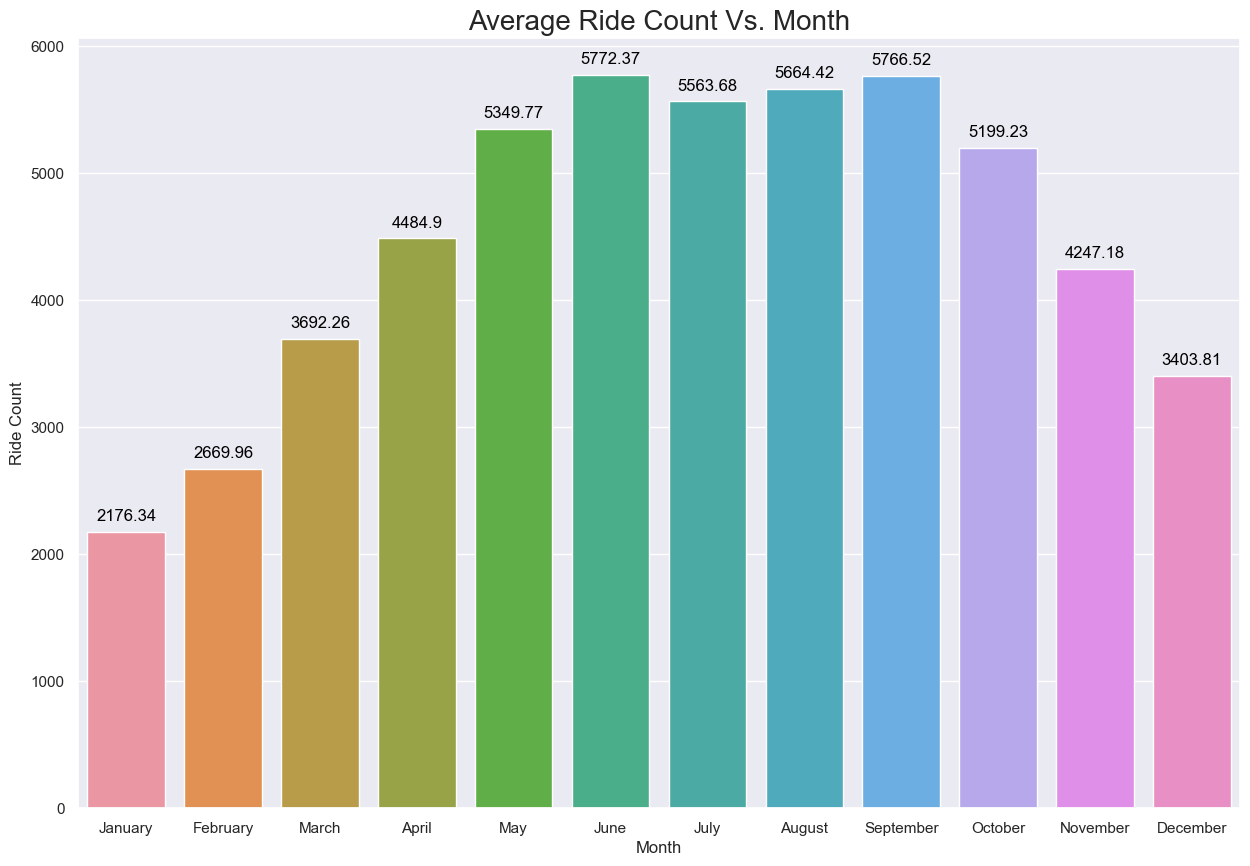

In [222]:
import datetime
bar_graph_plot_function(data=month_dist, graph_title='Average Ride Count Vs. Month', x_axis_label='Month',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=[datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)])

We see that number of Ride Count drastically increases between May to October which are comparatively Summer & Fall Season in US.

Month column is categorical column with each value corresponding to specific month.



Mapping numbers to respective Month Name

In [223]:
bike_df1.mnth = bike_df1.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

##### Let's plot distrubution of Ride Count Mean Across the days which are counted either as holidays or working day

In [224]:
bike_df1.holiday.describe()

count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

Holiday column is varied between 0 and 1 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

In [225]:
holiday_dist = bike_df1.groupby(by='holiday').cnt.mean()

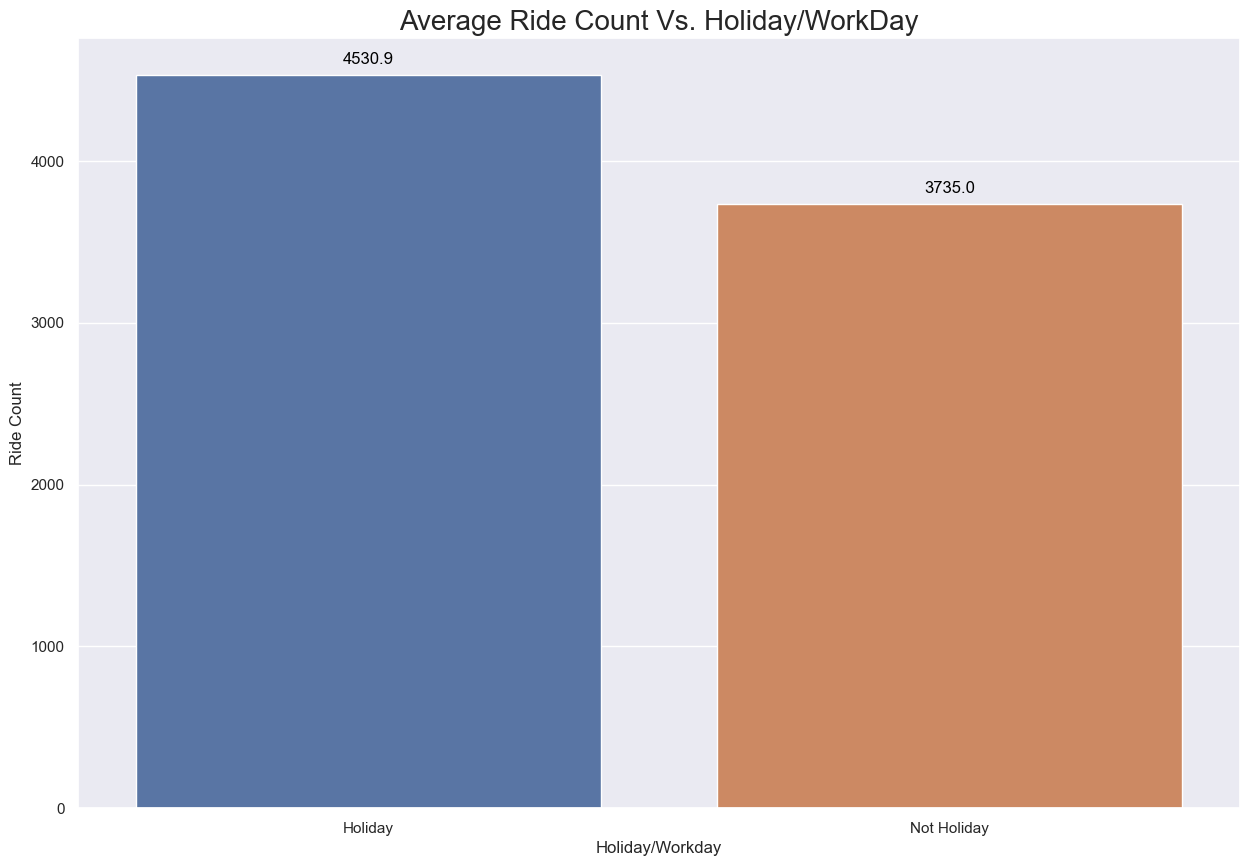

In [226]:
bar_graph_plot_function(data=holiday_dist, graph_title='Average Ride Count Vs. Holiday/WorkDay', x_axis_label='Holiday/Workday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Holiday', 'Not Holiday'])

Holiday is a Categorical Nomimal Variable. But there are only 2 values, "Yes" or "No" mapped to "1" & "0" respectively.
So, we will leave this as it is.

##### Let's plot distrubution of Ride Count Mean Across the days of weeks 

In [227]:
bike_df1.weekday.describe()

count    730.000000
mean       2.995890
std        2.000339
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

Mapping numbers to respective weekday Name

In [228]:
weekday_dist = bike_df1.groupby(by='weekday').cnt.mean()

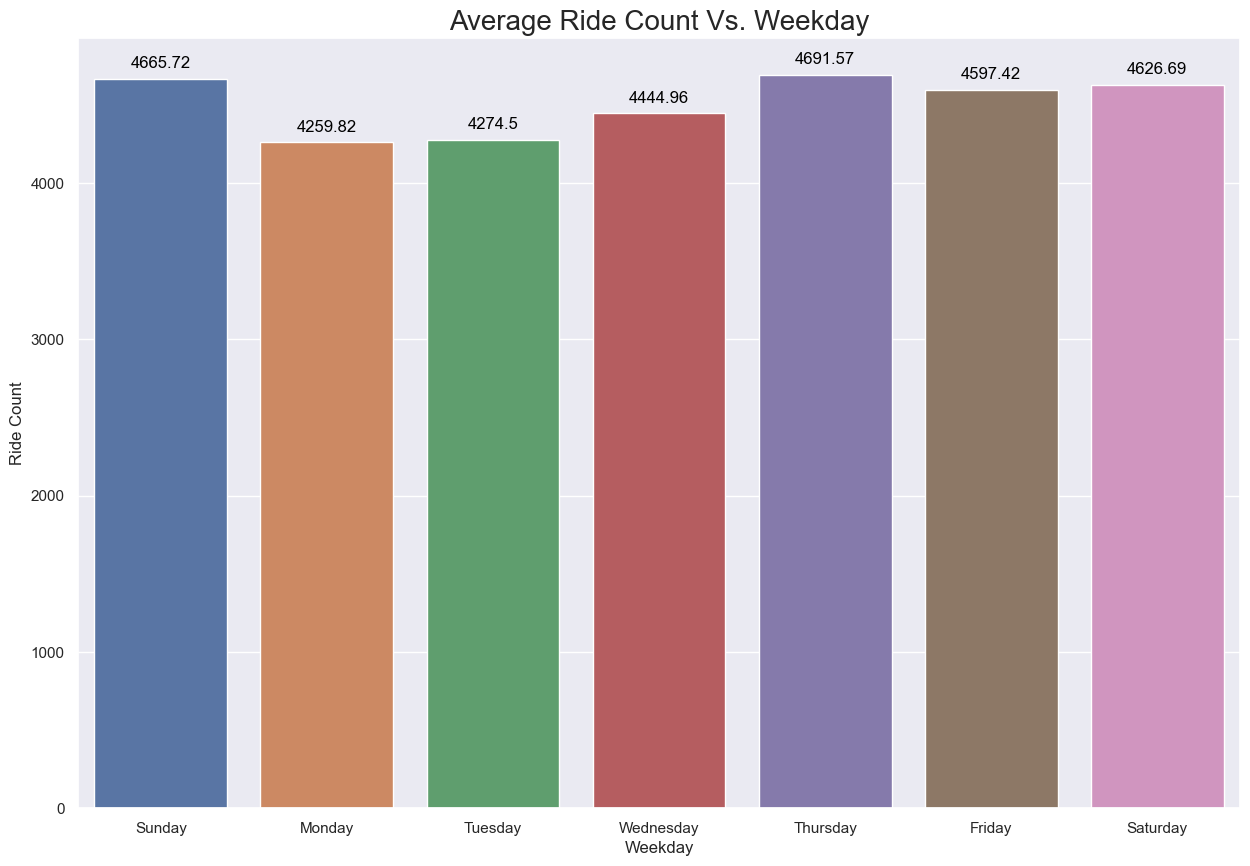

In [229]:
bar_graph_plot_function(data=weekday_dist, graph_title='Average Ride Count Vs. Weekday', x_axis_label='Weekday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

As per United States, it is usually considered that 1st day of week is Sunday.

And also from "Working Day Column", we can see that "Working Day" is marked as "1" for values of 1, 2, 3, 4, 5 in "Week day"

From this we can infer that, for weekday column, Sunday is mapped to 0, Monday is mapped to 1 and so on

In [230]:
bike_df1['weekday'] = bike_df1.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bike_df1.groupby(by='weekday').weekday.count()

weekday
fri    104
mon    105
sat    104
sun    104
thu    104
tue    105
wed    104
Name: weekday, dtype: int64

##### Let's plot distrubution of Ride Count Mean Across the days which are working days or not

In [231]:
bike_df1.workingday.describe()

count    730.000000
mean       0.690411
std        0.462641
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64

Working Day column is varied between 0 and 1 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

In [232]:
bike_df1.groupby(by='workingday').workingday.count()

workingday
0    226
1    504
Name: workingday, dtype: int64

Working Day is a Categorical Nomimal Variable. But there are only 2 values, "Yes" or "No" mapped to "1" & "0" respectively.

So, we will leave this as it is.

In [233]:
workingday_dist = bike_df1.groupby(by='workingday').cnt.mean()

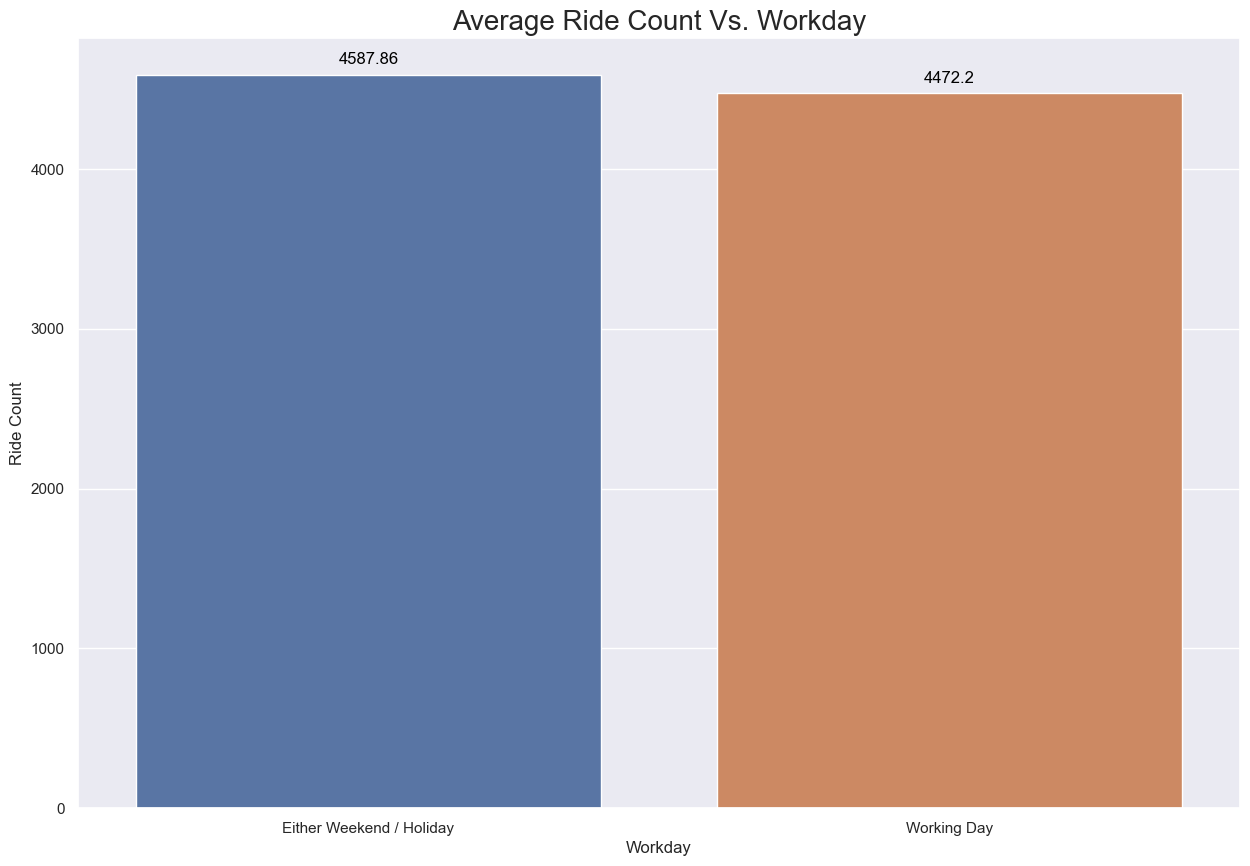

In [234]:

bar_graph_plot_function(data=workingday_dist, graph_title='Average Ride Count Vs. Workday', x_axis_label='Workday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Either Weekend / Holiday', 'Working Day'])

##### Let's plot distrubution of Ride Count Mean Across Weather Situation

In [235]:
bike_df1.weathersit.describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

Weather Situation column is varied between 1 to 3 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

In [236]:
bike_df1.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64

Weather Situation is a Categorical Nomimal Variable where evry number is mapped as follows:

* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

As per the explanation, we will map each number with a shorter version

* 1: clear
* 2: mist
* 3: light


After analysing the column we see that, there are no values corersponding to Heavy Rain. So, after mapping, this value will be completely cancelled out during one hot encoding process.

In [237]:
bike_df1['weathersit'] = bike_df1.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [238]:
bike_df1.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [239]:
weathersit_dist = bike_df1.groupby(by='weathersit').cnt.mean()

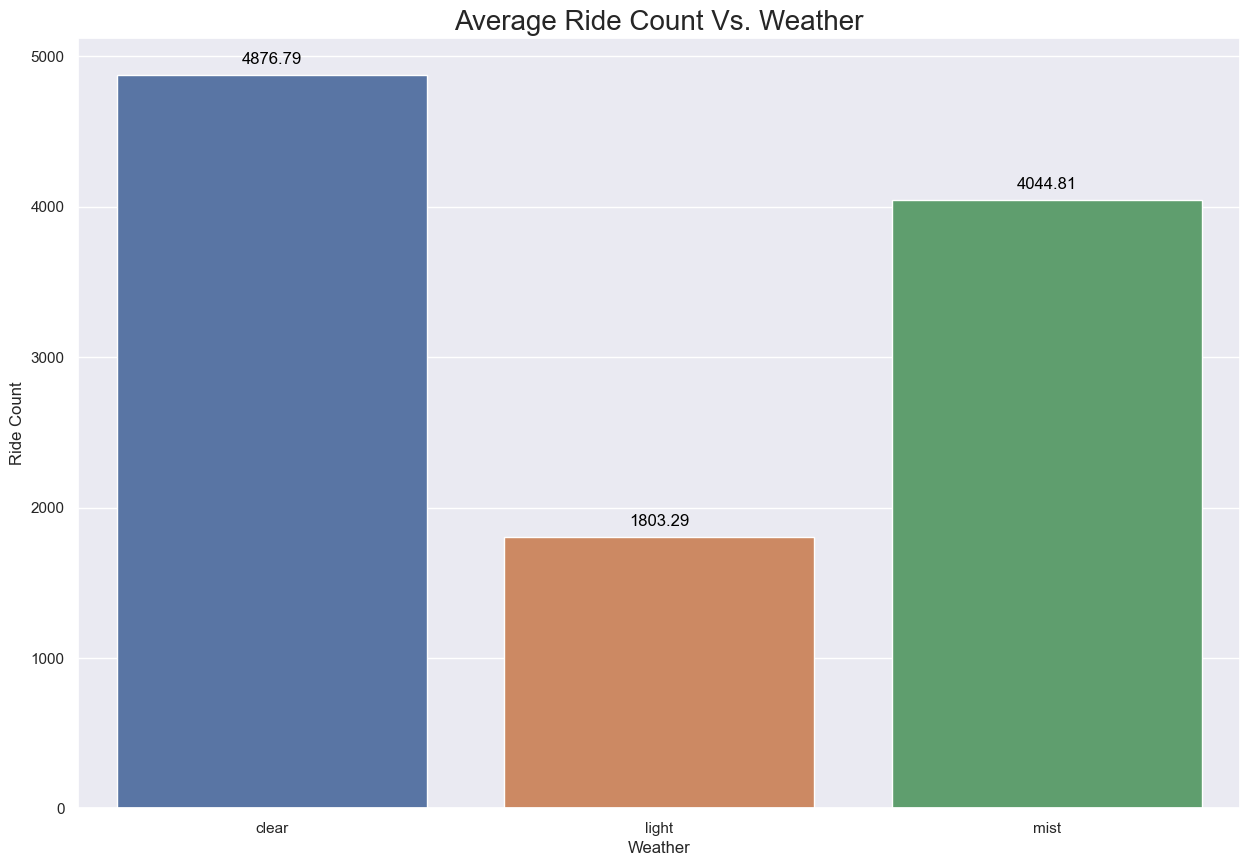

In [240]:

bar_graph_plot_function(data=weathersit_dist, graph_title='Average Ride Count Vs. Weather', x_axis_label='Weather',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

#### Drawing pairplots to check for linear relationship

<Figure size 1500x3000 with 0 Axes>

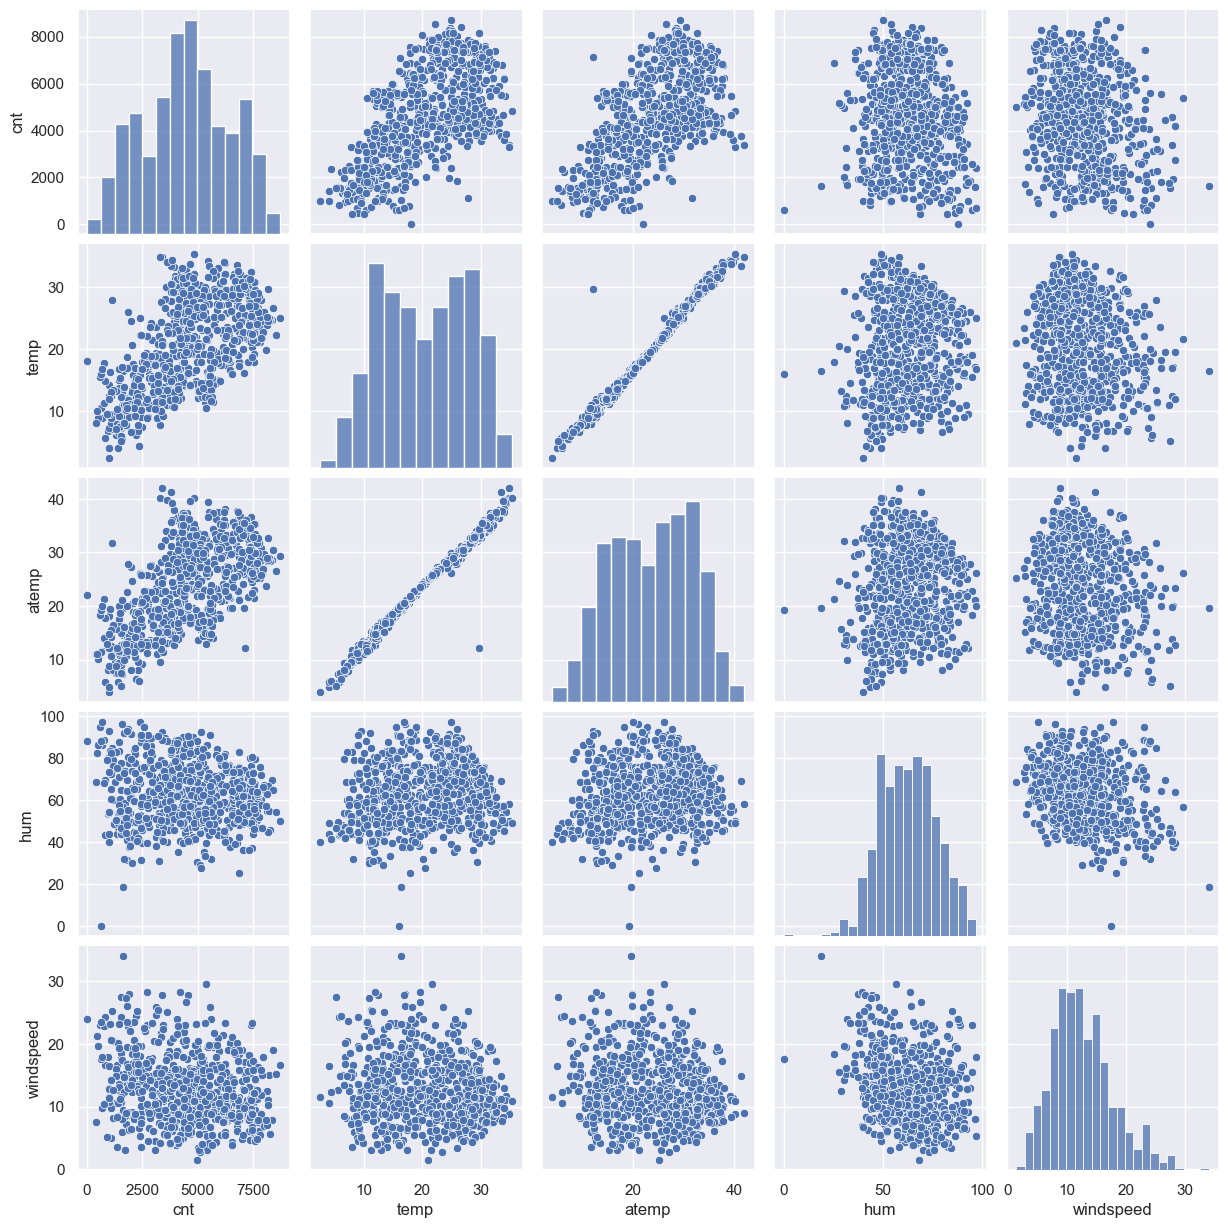

In [241]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df1,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- So from the above plots we can clearly understand that temp and atemp are having high correlation.
- And from the plots we can also say that there is alinear relationship between TEMP and ATEMP.

##### Visualising data to find correlation from numerical variables

<Figure size 2000x1500 with 0 Axes>

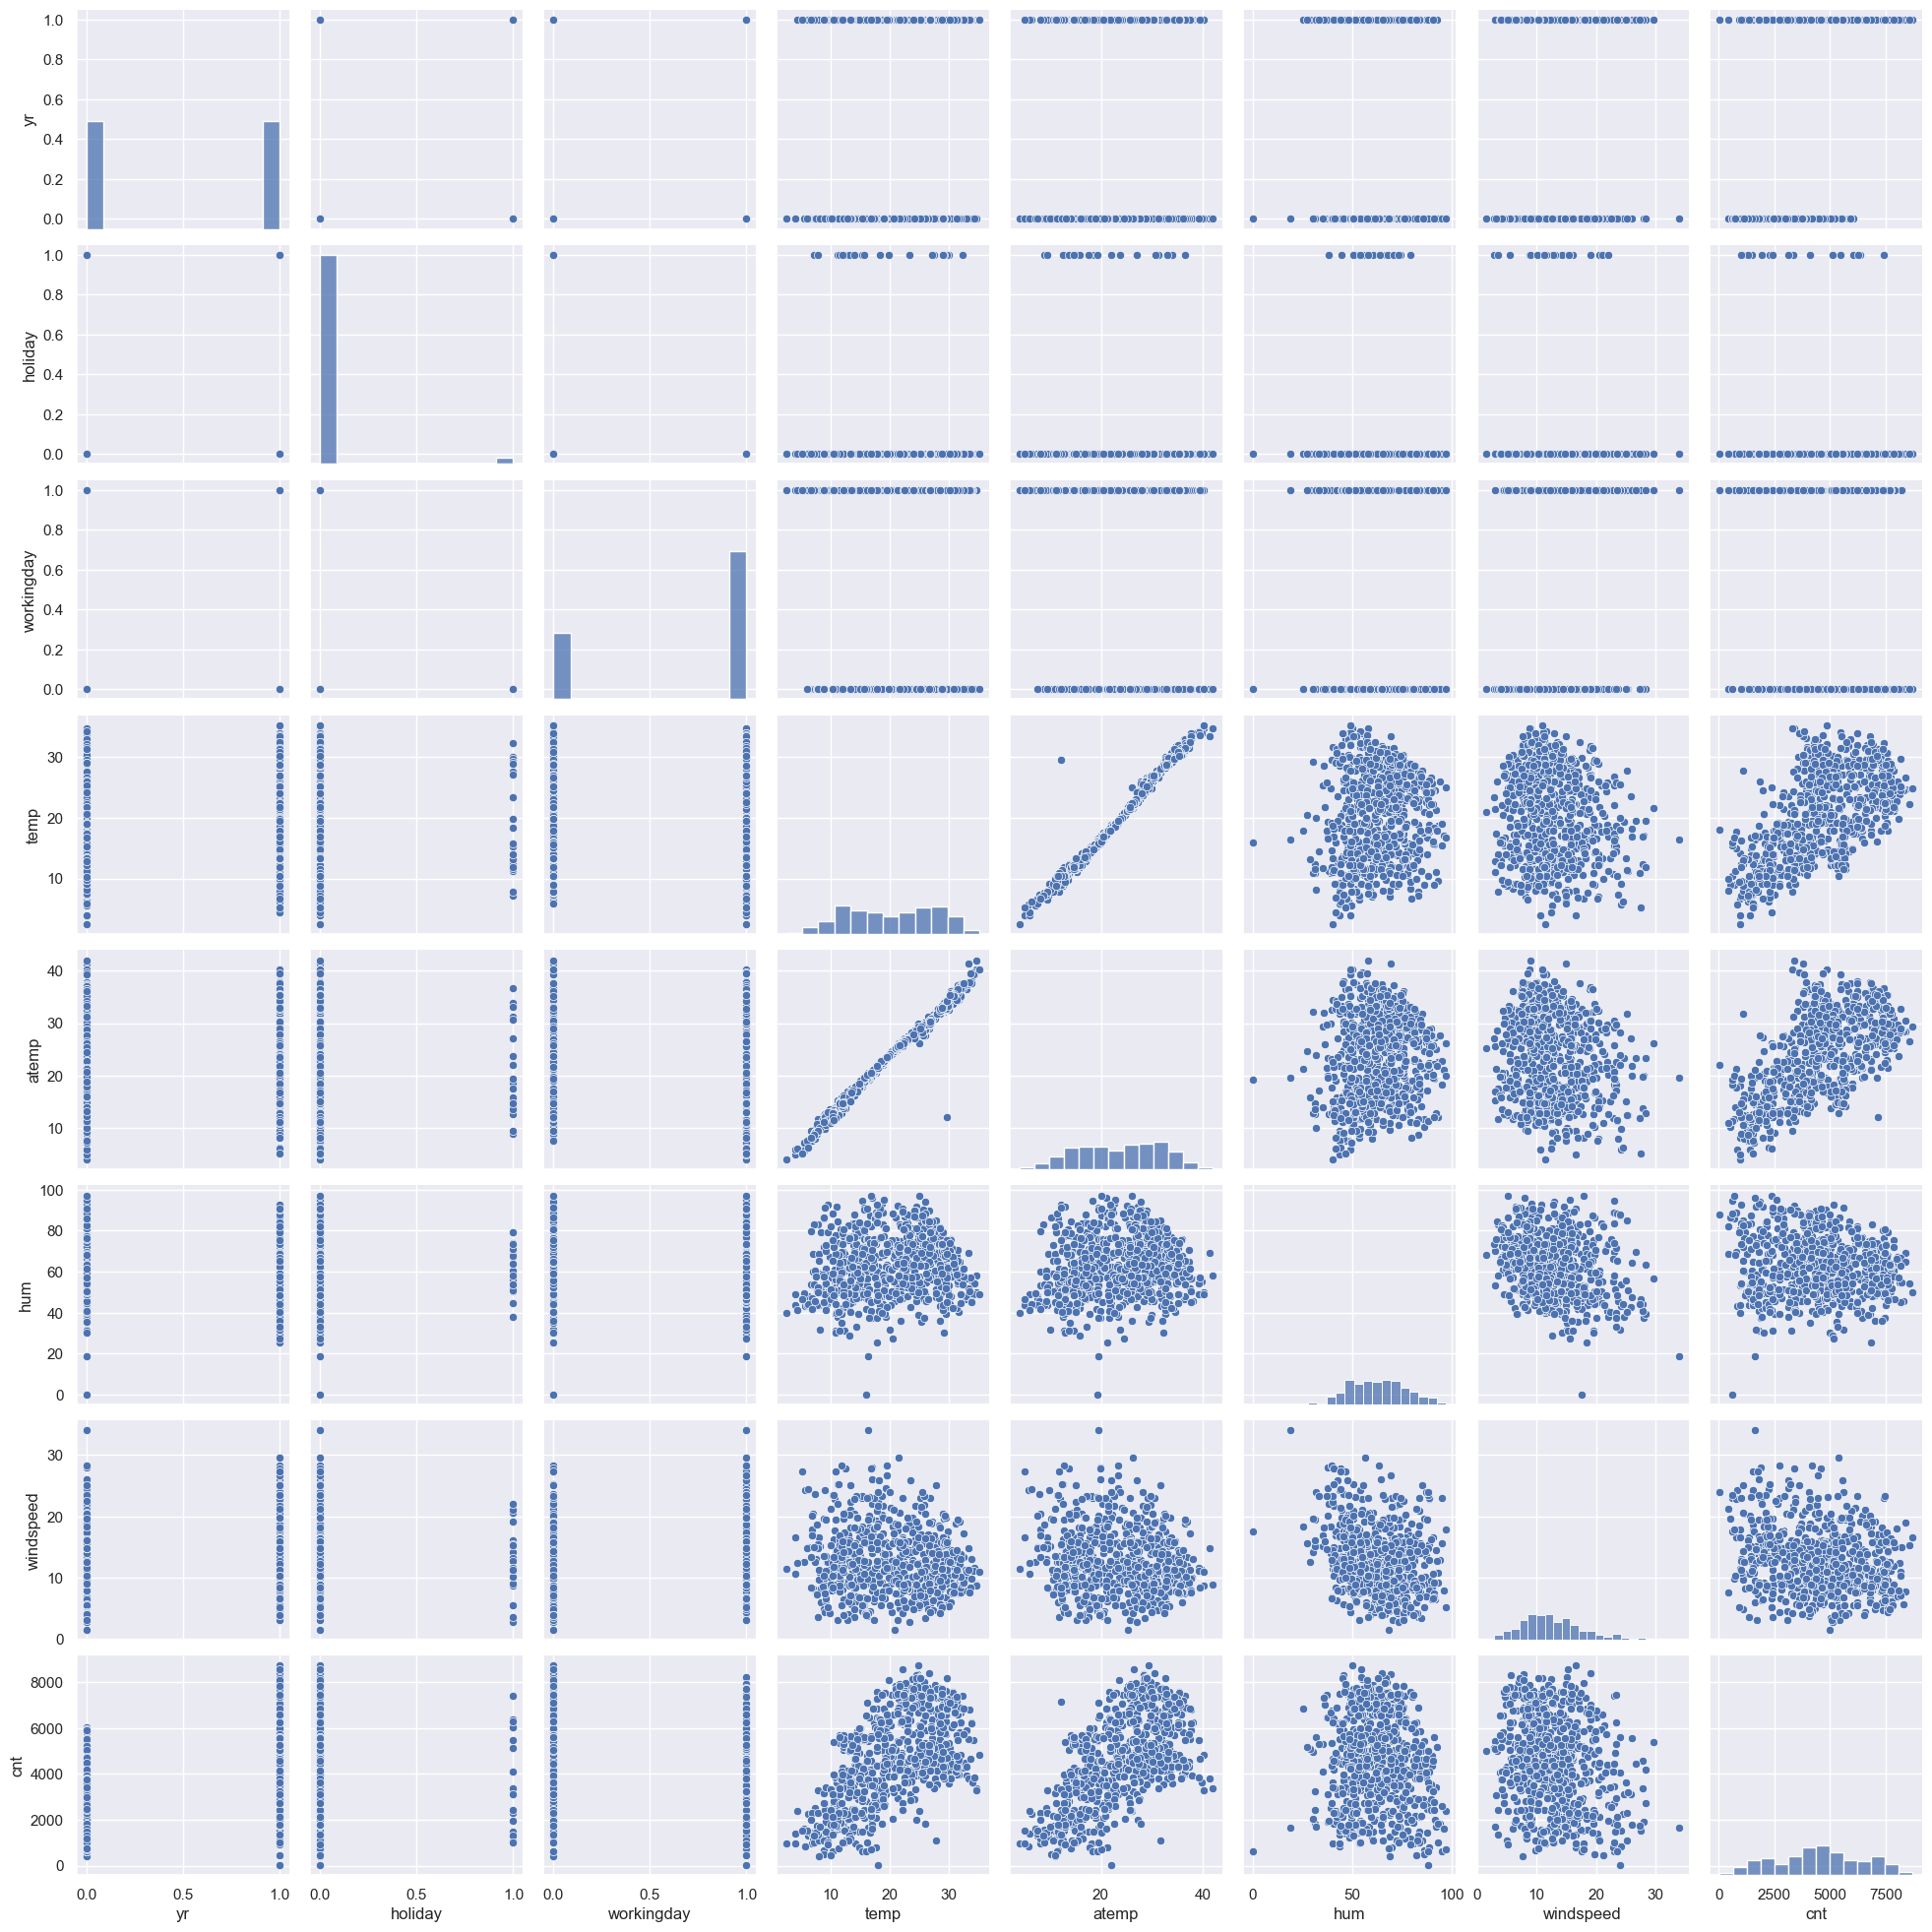

In [242]:
plt.figure(figsize=(20,15))
sns.pairplot(bike_df1)
plt.show()

##### Heatmap for correlation between numeric variables

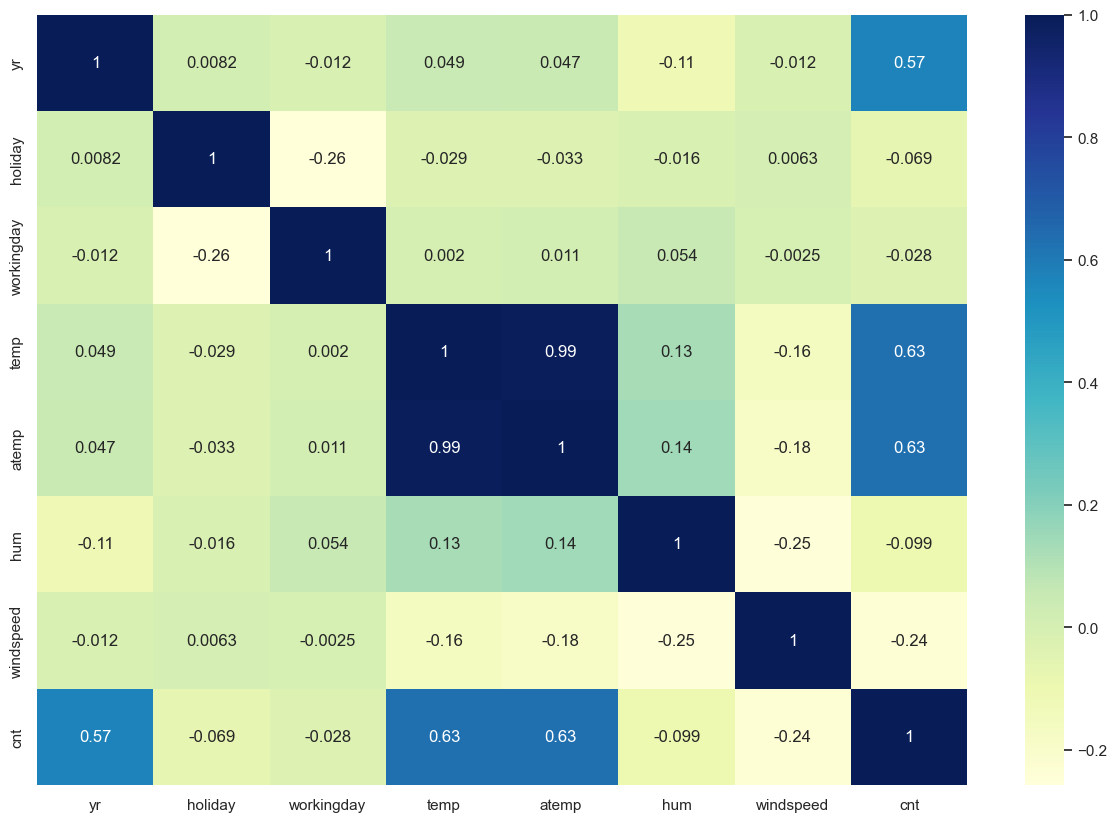

In [243]:
plt.figure(figsize=(15,10))
sns.heatmap(bike_df1.corr(),cmap="YlGnBu",annot=True)
plt.show()

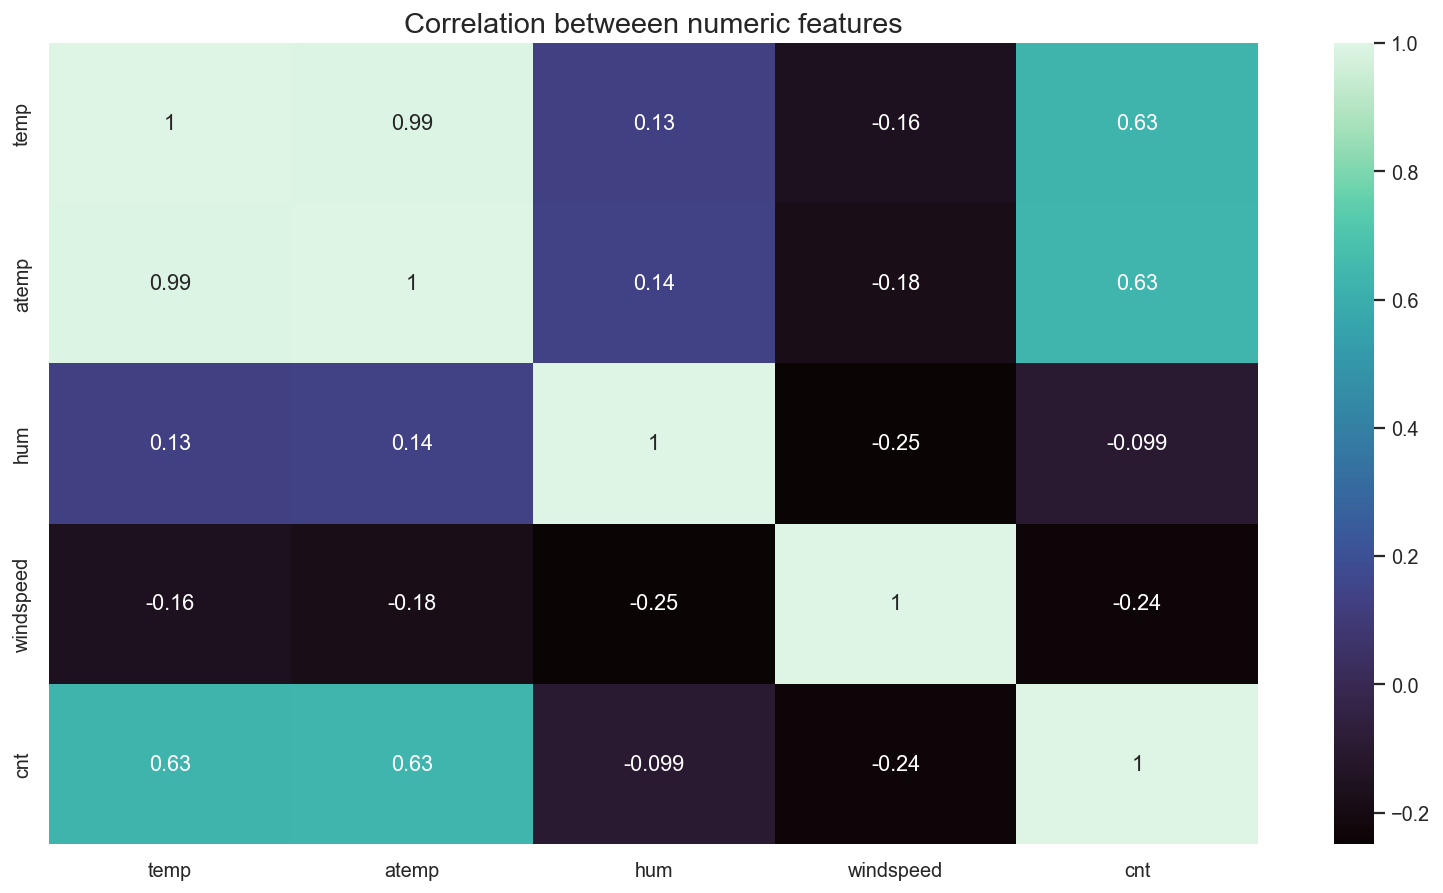

In [244]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(bike_df1[num_features].corr(),annot= True,cmap="mako")
plt.show()


- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

##### Creating Dummy Variables

The variables mnth weekday season weathersit have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.

We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.

In [245]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = bike_df1[['season','mnth','weekday','weathersit']]

In [246]:
dummy = pd.get_dummies(dummy,drop_first=True)

In [247]:
# Adding the dummy variables to the original dataset
bike_df1 = pd.concat([dummy,bike_df1],axis = 1)


In [248]:
#Deleting the orginal columns season.weathersit,weekday,mnth

bike_df1.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

bike_df1.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_light,weathersit_mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [249]:
bike_df1.shape

(730, 30)

In [250]:
bike_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season_spring     730 non-null    uint8  
 1   season_summer     730 non-null    uint8  
 2   season_winter     730 non-null    uint8  
 3   mnth_aug          730 non-null    uint8  
 4   mnth_dec          730 non-null    uint8  
 5   mnth_feb          730 non-null    uint8  
 6   mnth_jan          730 non-null    uint8  
 7   mnth_jul          730 non-null    uint8  
 8   mnth_jun          730 non-null    uint8  
 9   mnth_mar          730 non-null    uint8  
 10  mnth_may          730 non-null    uint8  
 11  mnth_nov          730 non-null    uint8  
 12  mnth_oct          730 non-null    uint8  
 13  mnth_sept         730 non-null    uint8  
 14  weekday_mon       730 non-null    uint8  
 15  weekday_sat       730 non-null    uint8  
 16  weekday_sun       730 non-null    uint8  
 1

### Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [251]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_df1, train_size = 0.7, random_state = 100)

In [252]:
print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


### Step 5: Rescaling the Features

Although scaling doesn't impact the linear model in the case of simple linear regression, however while performing multiplwe linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [253]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [254]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [255]:
train.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_light,weathersit_mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095


In [256]:
train.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_light,weathersit_mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the coefficients to see which variables are highly correlated

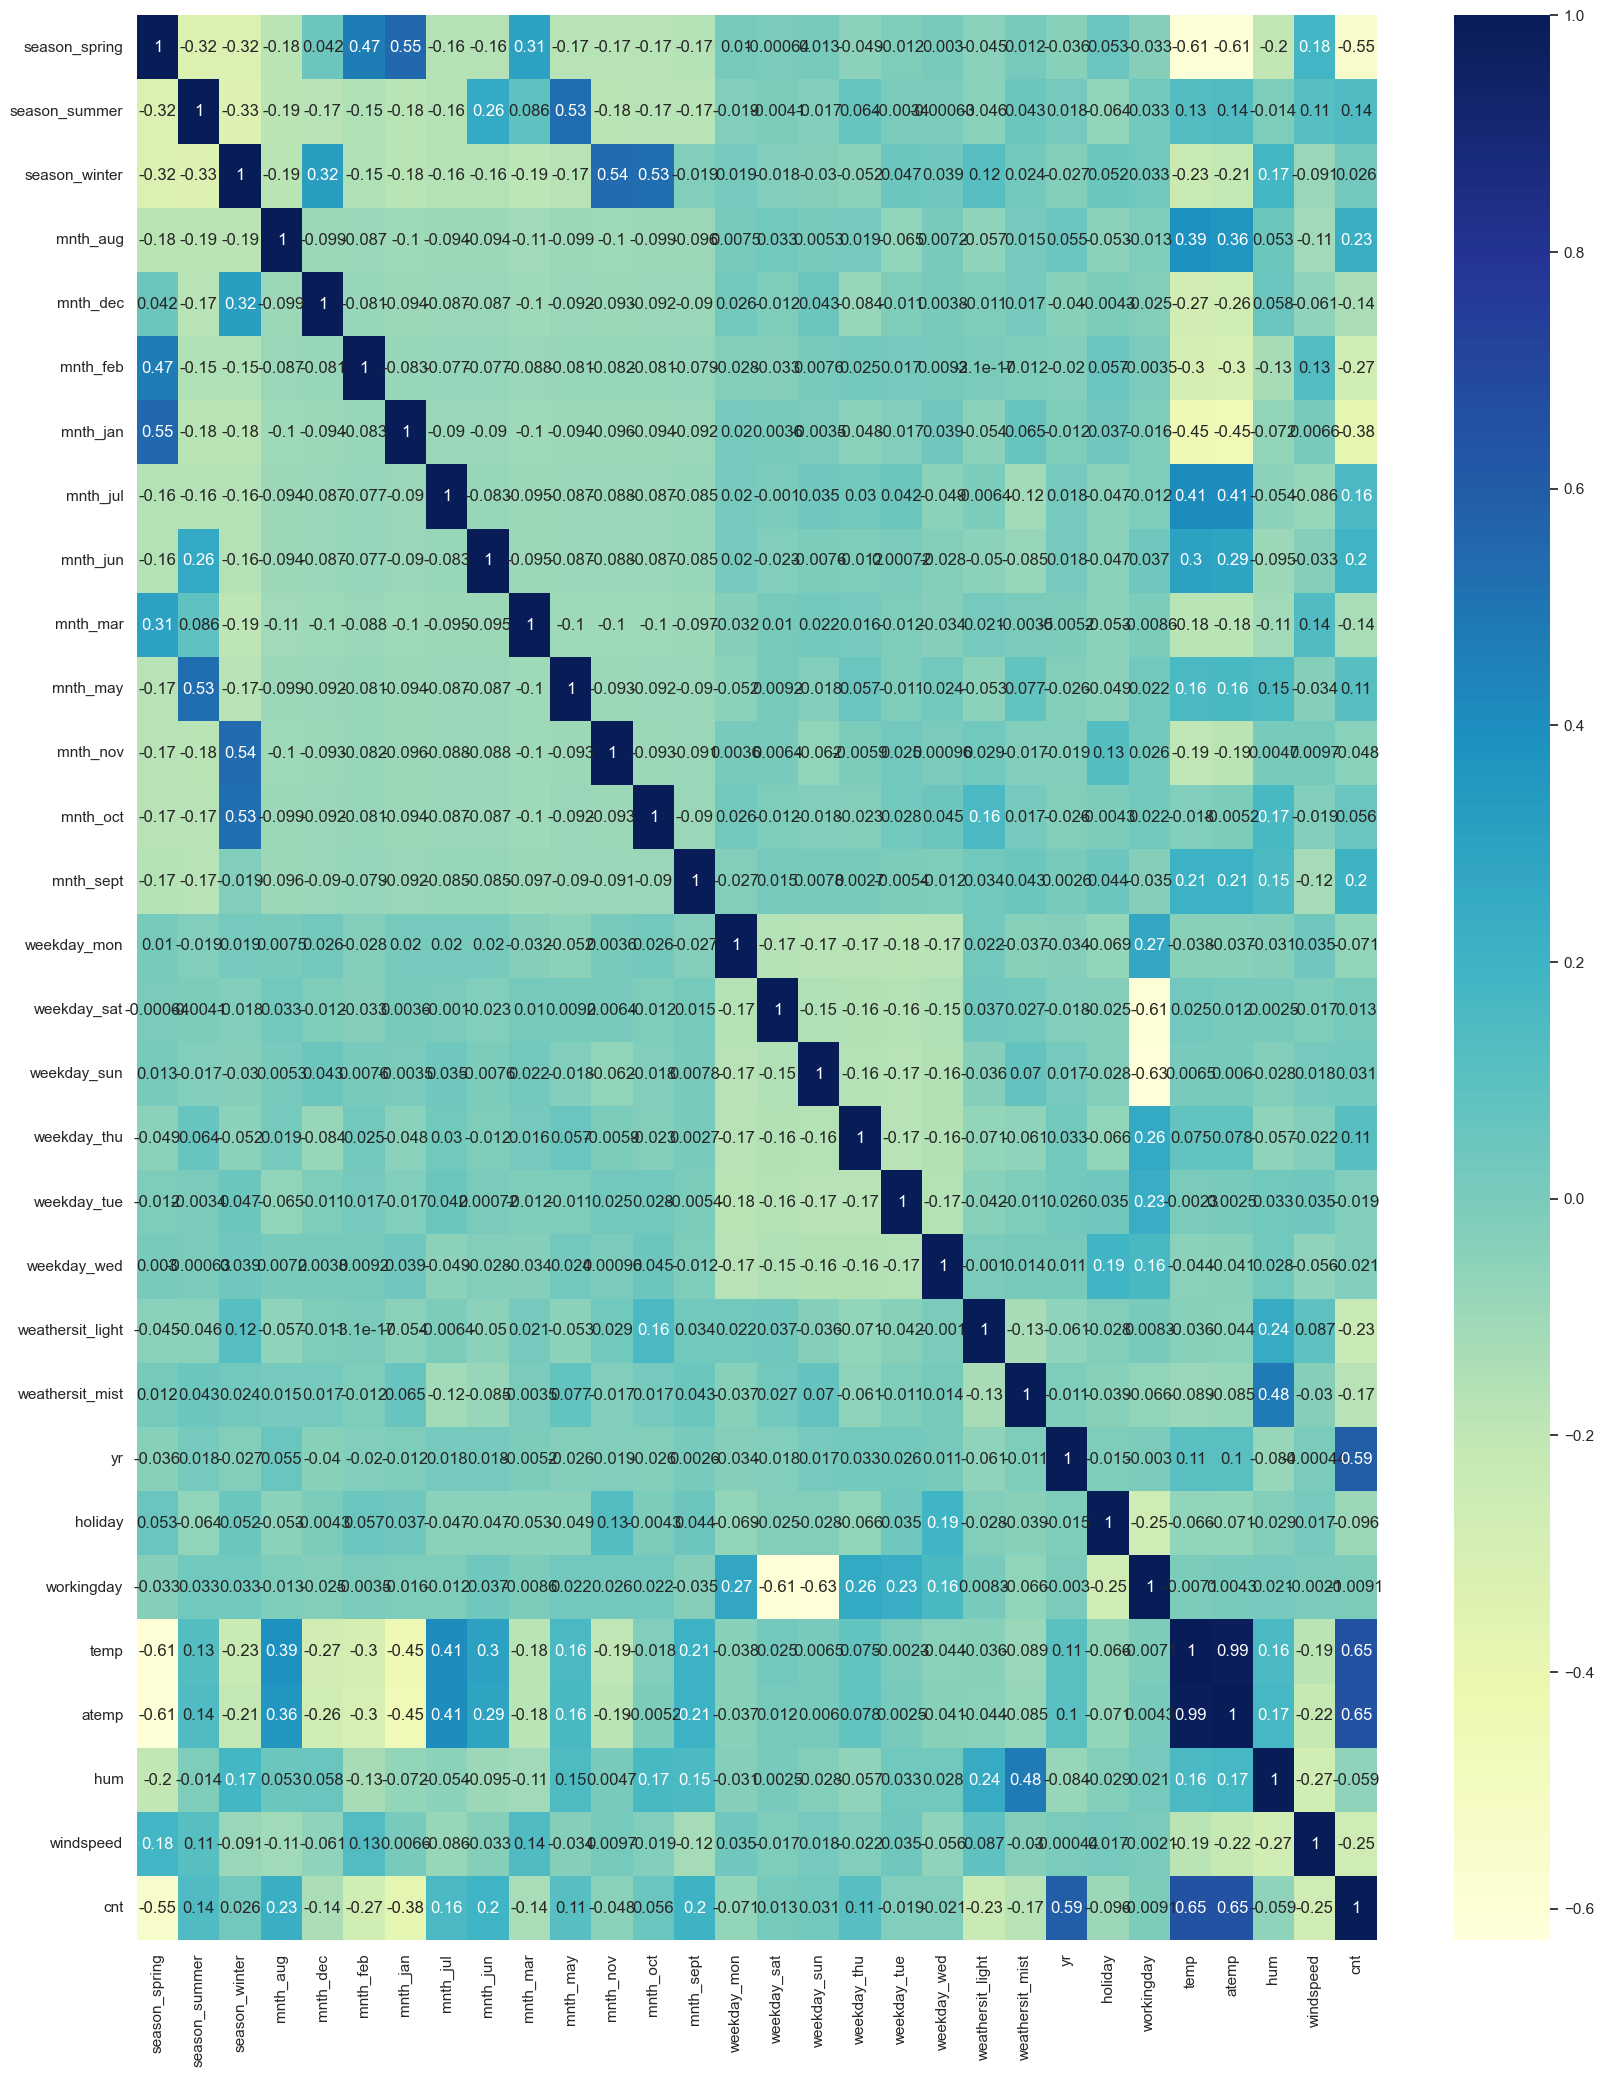

In [257]:
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

***Inference:***<br/>
As can be seen from the map, atemp and temp seems to be correlated to the target variable cnt. Since, not much can be stated about the other independent variables , hence we'll build a model using all the columns.

Dividing into X and Y sets for the model building

In [258]:
y_train = train.pop('cnt')
X_train = train

In [259]:
y_train.shape

(510,)

### Step 6: Building a linear model

APPROACH USED :
We will use a mixed approach to build the model.
Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model

##### Feature Selection
We start with 15 variables.<br>
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [260]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [261]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [262]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11),
 ('weathersit_light', True, 1),
 ('weathersit_mist', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [263]:
col = X_train.columns[rfe.support_]
col

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_light',
       'weathersit_mist', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [264]:
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'workingday', 'atemp'],
      dtype='object')

##### Building model using statsmodel for the detailed statistics

In [265]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

##### Adding a constant variable

For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [266]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [267]:
X_train_lm.head()

,const,season_spring,season_summer,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sept,weathersit_light,weathersit_mist,yr,holiday,temp,hum,windspeed
576,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,0,0,0,1,1,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,1,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,0,0,0,1,1,0,0.395666,0.504508,0.188475
111,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0.345824,0.751824,0.380981


Building the first linear models using statsmodels

***Model 1***



In [268]:
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          8.15e-189
Time:                        17:21:49   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3197      0.036      8.859      0.000       0.249       0.391
season_spring       -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer        0.0423      0.015      2.761      0.006       0.012       0.072
season_winter        0.1019      0.018      5.656      0.000       0.067       0.137
mnth_dec            -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_jan            -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_jul            -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_nov            -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_sept            0.0755      0.017      4.466      0.000       0.042       0.109
weathersit_light    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weathersit_mist     -0.0543      0.010     -5.194      0.000      -0.075      -0.034
yr                   0.2304      0.008     28.487      0.000       0.215       0.246
holiday             -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                 0.4815      0.037     13.005      0.000       0.409       0.554
hum                 -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed           -0.1887      0.026     -7.315      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Inference :***
Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and check VIF.

##### Checking VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 

In [269]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [270]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
13,hum,30.89
12,temp,17.79
14,windspeed,4.72
0,season_spring,4.37
2,season_winter,4.06
1,season_summer,2.82
9,weathersit_mist,2.32
10,yr,2.09
6,mnth_nov,1.85
4,mnth_jan,1.75


In general we want VIF to be less than 5. We will drop feature hum which has highest VIF of 30.89

In [271]:
# dropping season_Spring since its vif > 5

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

***Model 2***

In [272]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          4.75e-186
Time:                        17:21:49   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2450      0.032      7.618      0.000       0.182       0.308
season_spring       -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_summer        0.0349      0.015      2.251      0.025       0.004       0.065
season_winter        0.0869      0.018      4.831      0.000       0.052       0.122
mnth_dec            -0.0428      0.018     -2.413      0.016      -0.078      -0.008
mnth_jan            -0.0500      0.018     -2.719      0.007      -0.086      -0.014
mnth_jul            -0.0500      0.019     -2.703      0.007      -0.086      -0.014
mnth_nov            -0.0395      0.019     -2.064      0.040      -0.077      -0.002
mnth_sept            0.0687      0.017      4.015      0.000       0.035       0.102
weathersit_light    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
weathersit_mist     -0.0801      0.009     -9.198      0.000      -0.097      -0.063
yr                   0.2345      0.008     28.687      0.000       0.218       0.251
holiday             -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                 0.4387      0.036     12.093      0.000       0.367       0.510
windspeed           -0.1585      0.025     -6.276      0.000      -0.208      -0.109
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
12,temp,5.17
13,windspeed,4.67
2,season_winter,2.95
0,season_spring,2.89
1,season_summer,2.24
10,yr,2.07
6,mnth_nov,1.81
4,mnth_jan,1.66
5,mnth_jul,1.59
9,weathersit_mist,1.57


***Inference :***
Now as you can see, the VIFs and p-values both are within an acceptable range. Hence, we finalise lm_2 as the final model to proceed with the future prdeictions.

### Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [274]:
y_train_pred = lm_2.predict(X_train_lm)

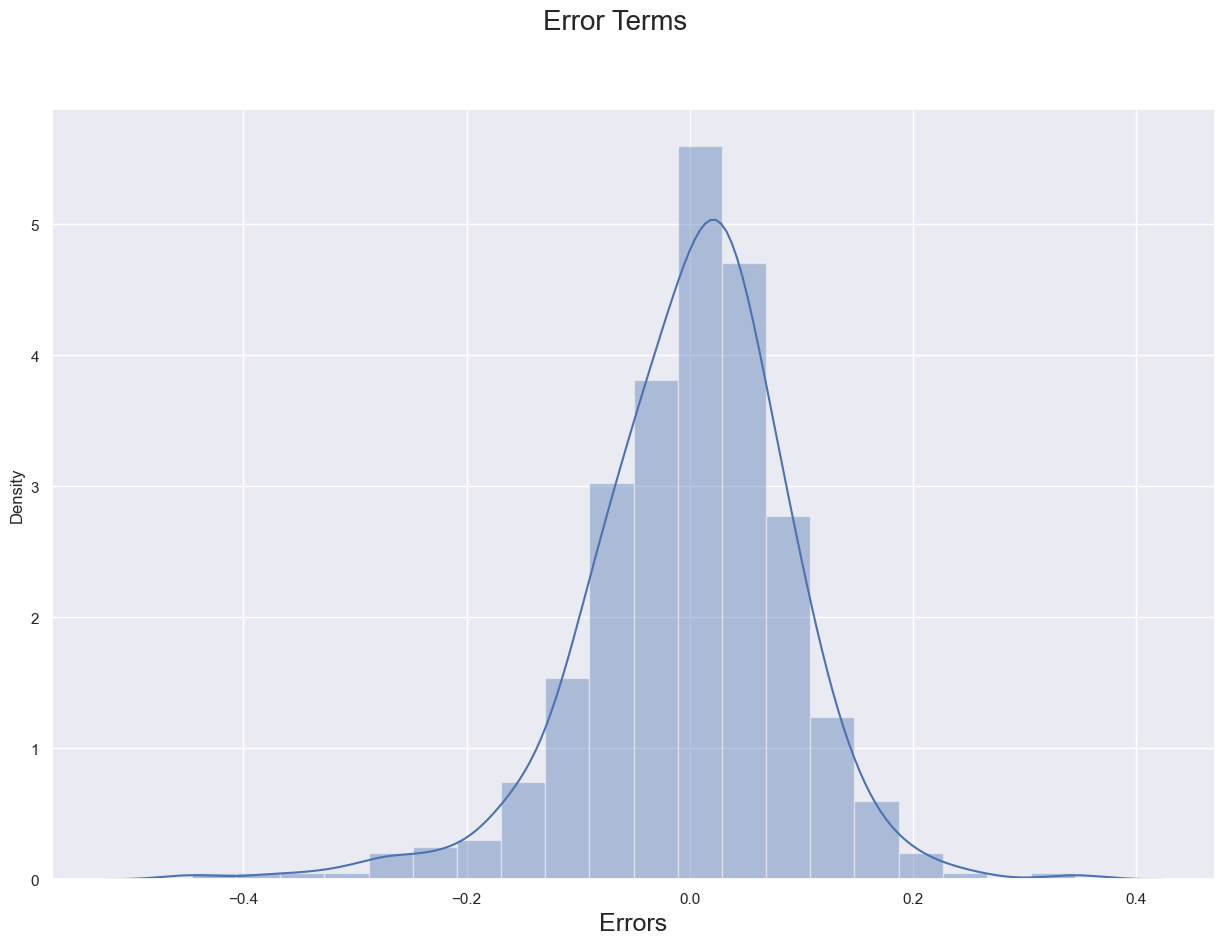

In [275]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

***Inference:***
We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

Cross-verifying the above conclusion using a qq-plot as well:

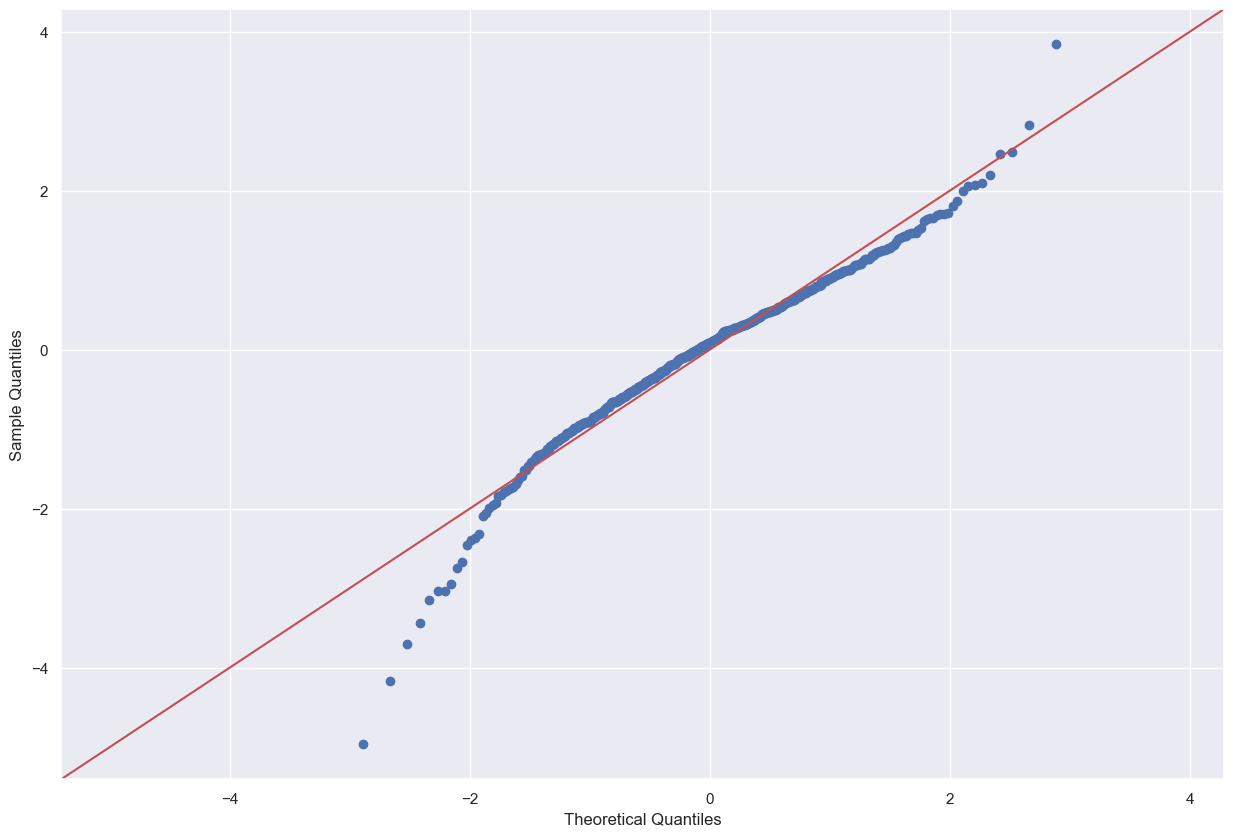

In [276]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

***Inference:***
Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

### Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

#### Applying the scaling on the test sets

In [277]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

In [278]:
test.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_light,weathersit_mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [279]:
y_test = test.pop('cnt')
X_test = test

In [280]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_2.predict(X_test)

#### Calculating the r-squared

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [281]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.8391472034949233
r2_score of test dataset 0.813676132581787


***Inference:***
We can see that the r_squared on the test set is 0.813 and the r-squared on the trained set 0.839 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

### Step 9: Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

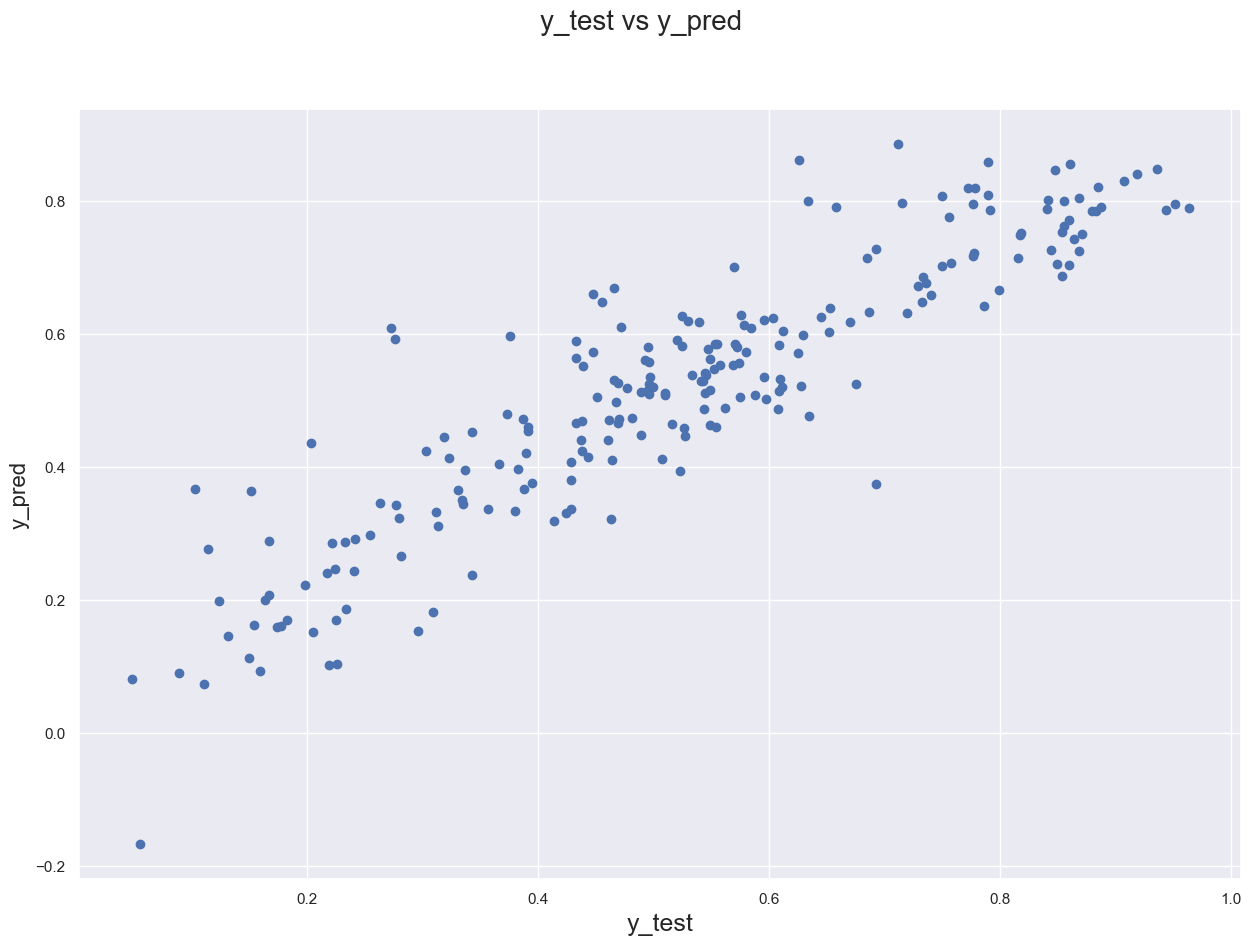

In [282]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

***Inference:***
We can colude that the final model fit isn't by chance, and has descent predictive power.

#### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [283]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
13,temp,0.438717
0,const,0.245029
11,yr,0.234455
3,season_winter,0.086883
8,mnth_sept,0.068730
2,season_summer,0.034890
7,mnth_nov,-0.039513
4,mnth_dec,-0.042806
5,mnth_jan,-0.050008


#### Final Conclusions :

By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

$ cnt = 0.245 + 0.4387 \times  temp + 0.2342  \times  yr + 0.0868 \times season Winter + 0.0687 \times mnth Sept + 0.0348 \times season Summer - 0.0395 \times mnth Nov - 0.0428 \times mnth Dec - 0.0500 \times mnth Jan - 0.0500 \times mnth Jul - 0.0712 \times season Spring - 0.0800 \times weathersit Mist Cloudy - 0.0917 \times holiday - 0.1584 \times windspeed - 0.2917 \times weathersit Light Snow Rain $

##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
##### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:

 - Temperature (0.438717)
 - weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.291749)
 - year (0.234455)

Hence, it can be clearly concluded that the variables `temperature` , `season`/ `weather situation` and `month`  are significant in predicting the demand for shared bikes .

### Final Recommendations for the Company: 

- The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand.
- Holiday time seems to be least interesting bor biking, little motavation and marketing might help here.